### Name : Ghosh Kushanava Amitava
### Roll No : 220123083
### Course : MA323
### Branch : MnC

In [13]:
import time
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

### Question 1

In [14]:
# Linear Congruential Generator (LCG) for uniform distribution
def lcg(seed, size):
    a = 1664525
    c = 1013904223
    m = 2**32
    random_numbers = []
    for _ in range(size):
        seed = (a * seed + c) % m
        random_numbers.append(seed / m)
    return random_numbers

In [15]:
# Box-Muller method using LCG
def box_muller(n, seed):
    u1 = lcg(seed, n)
    u2 = lcg(seed + 1, n)
    z0 = [math.sqrt(-2 * math.log(u1[i])) * math.cos(2 * math.pi * u2[i]) for i in range(n)]
    z1 = [math.sqrt(-2 * math.log(u1[i])) * math.sin(2 * math.pi * u2[i]) for i in range(n)]
    return z0 + z1

In [16]:
# Marsaglia and Bray method using LCG
def marsaglia_bray(n, seed):
    samples = []
    rejected = 0
    while len(samples) < n:
        u1 = 2 * lcg(seed, 1)[0] - 1
        u2 = 2 * lcg(seed + 1, 1)[0] - 1
        s = u1 ** 2 + u2 ** 2
        if s < 1:
            factor = math.sqrt(-2 * math.log(s) / s)
            samples.append(u1 * factor)
            if len(samples) < n:
                samples.append(u2 * factor)
        else:
            rejected += 1
        seed += 2
    return samples, rejected

In [17]:
def calculate_statistics(samples):
    mean = sum(samples) / len(samples)
    variance = sum((x - mean) ** 2 for x in samples) / len(samples)
    return mean, variance

# Generate samples, compute stats and measure time
def generate_samples(method, n, seed):
    start_time = time.time()
    if method == 'box_muller':
        samples = box_muller(n, seed)
    elif method == 'marsaglia_bray':
        samples, rejected = marsaglia_bray(n, seed)
    elapsed_time = time.time() - start_time
    mean, variance = calculate_statistics(samples)
    if method == 'marsaglia_bray':
        rejection_rate = rejected / (rejected + n)
        return mean, variance, elapsed_time, rejection_rate
    return mean, variance, elapsed_time

In [18]:
# Part (a) - Sample generation and stats calculation
sizes = [100, 10000]
seed = 42  # Initial seed for LCG
results = {}

for method in ['box_muller', 'marsaglia_bray']:
    results[method] = {}
    for n in sizes:
        if method == 'marsaglia_bray':
            mean, variance, elapsed_time, rejection_rate = generate_samples(method, n, seed)
            results[method][n] = {'mean': mean, 'variance': variance, 'time': elapsed_time, 'rejection_rate': rejection_rate}
        else:
            mean, variance, elapsed_time = generate_samples(method, n, seed)
            results[method][n] = {'mean': mean, 'variance': variance, 'time': elapsed_time}

# Print the results
for method in results:
    for n in results[method]:
        print(f"{method} - Sample size: {n}")
        print(f"Mean: {results[method][n]['mean']}")
        print(f"Variance: {results[method][n]['variance']}")
        print(f"Time taken: {results[method][n]['time']} seconds")
        if method == 'marsaglia_bray':
            print(f"Rejection rate: {results[method][n]['rejection_rate']}")

box_muller - Sample size: 100
Mean: 0.0663699052855157
Variance: 0.9696176149290922
Time taken: 0.0009987354278564453 seconds
box_muller - Sample size: 10000
Mean: -0.004126960642540958
Variance: 0.9933822923046215
Time taken: 0.0850074291229248 seconds
marsaglia_bray - Sample size: 100
Mean: -0.934289348585675
Variance: 0.00275535594439681
Time taken: 0.0 seconds
Rejection rate: 0.0
marsaglia_bray - Sample size: 10000
Mean: -0.04868053438347077
Variance: 2.1054135836254764
Time taken: 0.06000494956970215 seconds
Rejection rate: 0.15895710681244743


In [19]:
# Part (c) - Compare rejection rate to 1 - π/4
expected_rejection_rate = 1 - math.pi / 4
print(f"Expected rejection rate (1 - π/4): {expected_rejection_rate}")

Expected rejection rate (1 - π/4): 0.21460183660255172


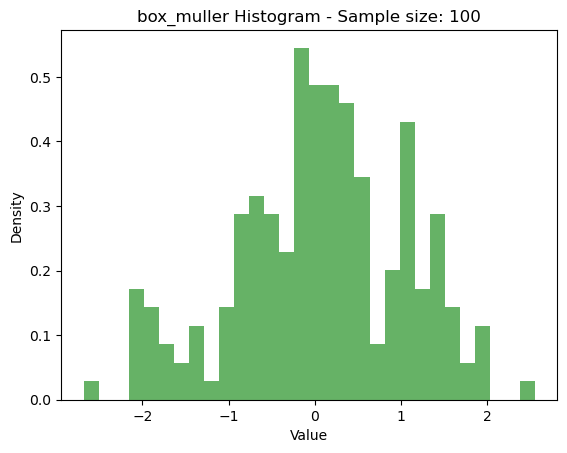

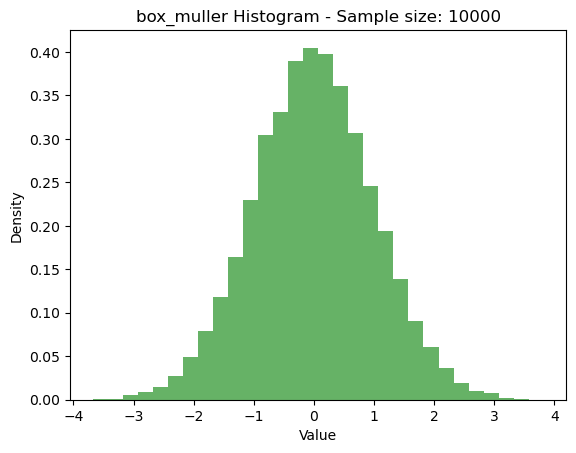

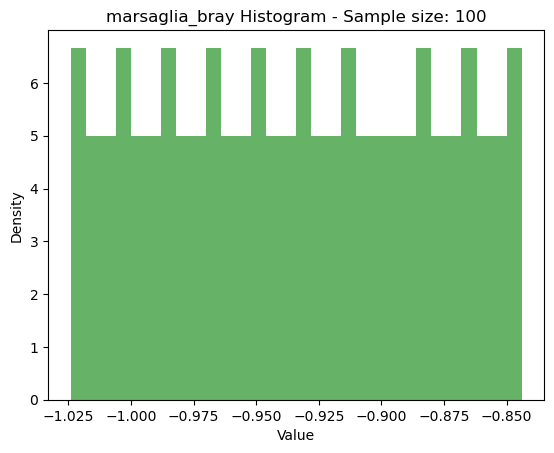

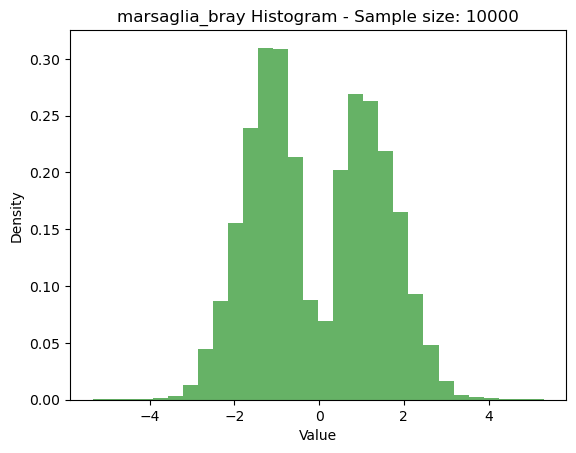

In [20]:
# Part (d) - Plot histograms
for method in results:
    for n in sizes:
        samples = box_muller(n, seed) if method == 'box_muller' else marsaglia_bray(n, seed)[0]
        plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
        plt.title(f"{method} Histogram - Sample size: {n}")
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.show()

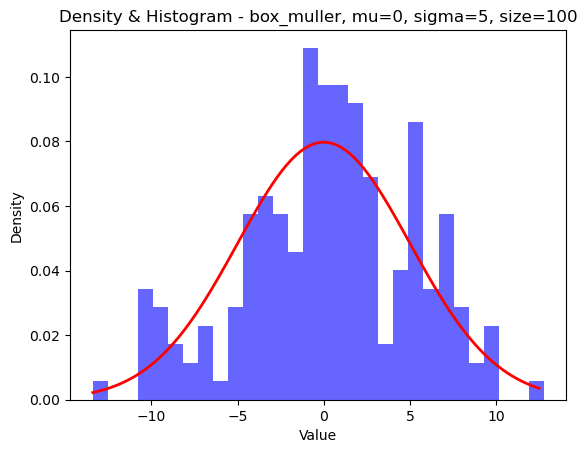

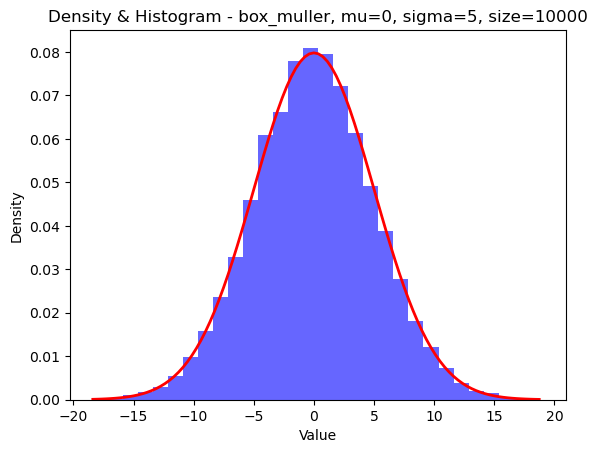

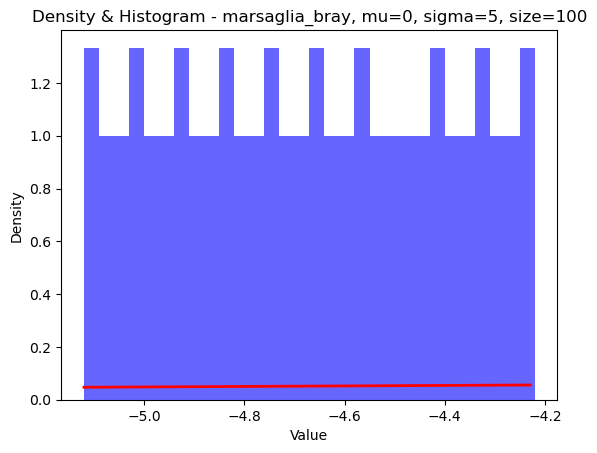

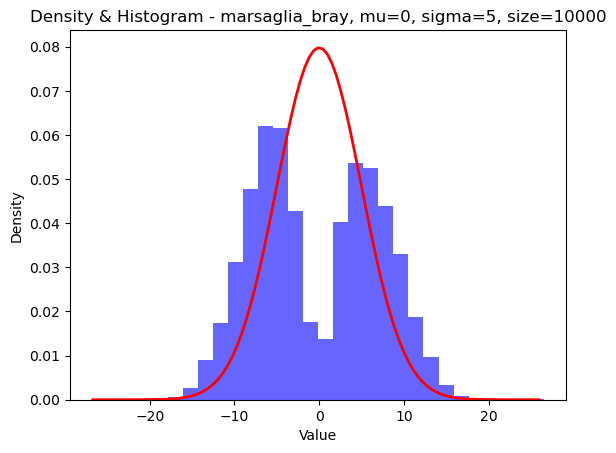

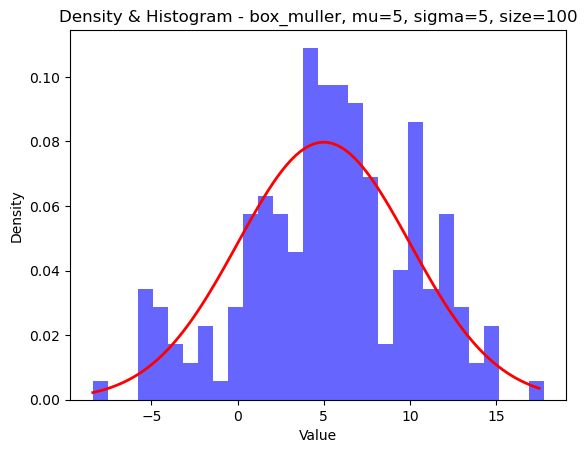

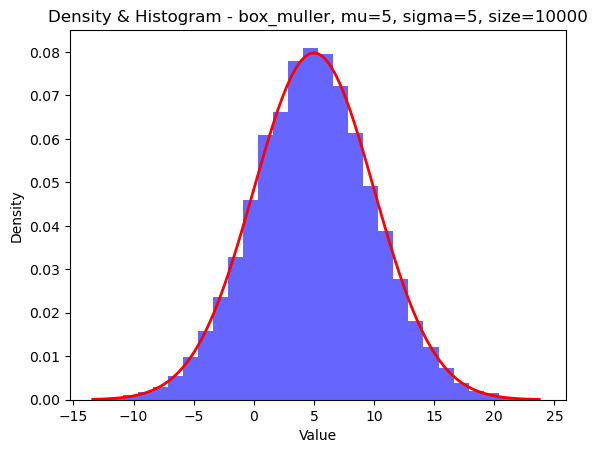

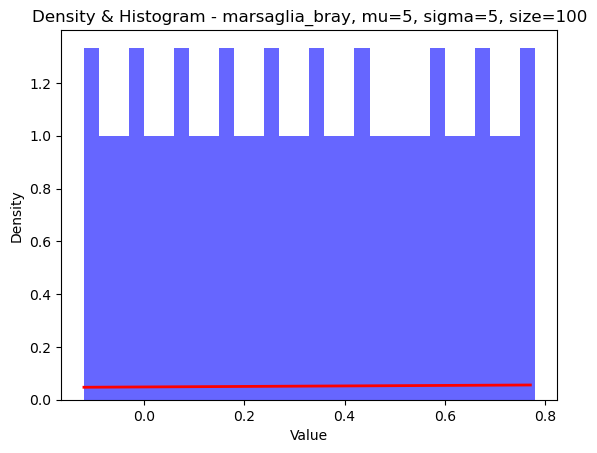

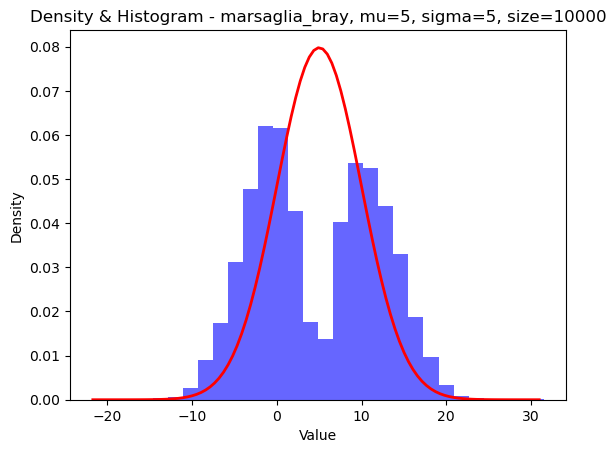

In [21]:
# Part (e) - Generate samples from N(0, 5) and N(5, 5) and plot
def generate_normal(mu, sigma, samples):
    return [mu + sigma * x for x in samples]

for mu, sigma in [(0, 5), (5, 5)]:
    for method in ['box_muller', 'marsaglia_bray']:
        for n in sizes:
            samples = box_muller(n, seed) if method == 'box_muller' else marsaglia_bray(n, seed)[0]
            transformed_samples = generate_normal(mu, sigma, samples)
            plt.hist(transformed_samples, bins=30, density=True, alpha=0.6, color='b')
            x = [min(transformed_samples) + (max(transformed_samples) - min(transformed_samples)) * i / 100 for i in range(100)]
            plt.plot(x, [norm.pdf(xi, mu, sigma) for xi in x], 'r-', lw=2)
            plt.title(f"Density & Histogram - {method}, mu={mu}, sigma={sigma}, size={n}")
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.show()

### Question 2

In [23]:
import math

# Linear Congruential Generator (LCG) for uniform distribution
def lcg(seed, size, low=-1.0, high=1.0):
    a = 1664525
    c = 1013904223
    m = 2**32
    random_numbers = []
    for _ in range(size):
        seed = (a * seed + c) % m
        random_numbers.append(low + (high - low) * (seed / m))
    return random_numbers

# Integrand function
def integrand(x):
    return math.exp(-x**2) / (1 + abs(x))

# Monte Carlo Integration using LCG
def monte_carlo_integration(L, N, seed):
    # Generate N random samples uniformly in [-L, L] using LCG
    samples = lcg(seed, N, -L, L)
    # Evaluate the function at these sample points
    function_values = [integrand(x) for x in samples]
    # Approximate the integral
    integral_approx = (2 * L / N) * sum(function_values)
    return integral_approx

# Parameters
L = 5  # Interval length
N = 10000  # Number of samples
seed = 42  # Initial seed for LCG

# Perform Monte Carlo integration
result = monte_carlo_integration(L, N, seed)
result

1.1873778787740734